Caricate il data set Arrythmia in una DataFrame Pandas.

Effettuate la pulizia dei dati eliminando le colonne che contengono più di un '?'. Nelle colonne che contengono un solo '?' sostituitelo col valor medio della colonna.

Sviluppate classificatori k-NN per classificare i dati con uno split train/test 60/40 per diversi valori di k e determinate il migliore (in base all'accuracy).

Effettuate una riduzione di dimensionalità con PCA in modo da mantenere il 90% della varianza ed effettuate nuovamente la classificazione k-NN per il solo valore migliore di k trovato in precedenza.

Riportate infine la matrice di confusione dei classificatori col miglior valore di k sia nel caso a dimensionalità piena che a dimensionalità ridotta.

In [4]:
from google.colab import drive
import pandas as pd

drive.mount('/content/gdrive')
#root = '/content/gdrive/MyDrive/arrhythmia.data'
root = '/content/gdrive/MyDrive/data/_arrhythmia/arrhythmia.csv'
labels = [f'{i}' for i in range(280)]
df = pd.read_csv(root, names=labels)
#df = pd.DataFrame(df)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
df

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1


In [6]:
df.shape

(452, 280)

In [7]:
to_drop = []
for col in range(df.shape[1]):
  countNaN = 0
  pos = 0
  for row in range(df.shape[0]):
    if df.iat[row, col] == '?':
      countNaN += 1
      pos = row
    if countNaN > 1:
      break
  if countNaN > 1:
    to_drop.append(col)
  elif countNaN == 1:
    x = df.drop(pos)
    x = x[x.columns[col]].astype(float)
    media = x.mean()
    df.iat[pos, col] = media

for i in to_drop:
  df = df.drop(columns=f'{i}')

In [8]:
df.shape

(452, 277)

In [9]:
df

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1


In [10]:
df_target = df.iloc[:,-1]
df_data = df.iloc[:,:-1]

In [11]:
df_data.shape

(452, 276)

In [12]:
df_target.shape

(452,)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    df_data, df_target, random_state=11, train_size=0.6)

In [15]:
X_train.shape

(271, 276)

In [16]:
X_test.shape

(181, 276)

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
max = [-1, 0]
for i in range(1,10):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X=X_train, y=y_train)
  score = knn.score(X_test,y_test)
  if score > max[1]:
    max[1] = score
    max[0] = i

print(f'k_best = {max[0]} -> {max[1]:.2%} ')


k_best = 3 -> 62.43% 


In [19]:
knn = KNeighborsClassifier(n_neighbors=max[0])
knn.fit(X=X_train, y=y_train)

predicted = knn.predict(X=X_test)
expected = y_test

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.90)
pca_data = pca.fit(df_data).transform(df_data)

In [21]:
pca_data

array([[  36.35983308,  -44.52375716,   32.16400505, ...,  -13.93180957,
         -17.75925704,    0.66318042],
       [ -11.75639147,   -9.99120797,   31.46217137, ...,   11.14699175,
          15.05617791,   -8.20565643],
       [ -85.70900326,   40.55277803,  -98.1028623 , ...,  -39.31872823,
         -15.81849154,  -21.56648365],
       ...,
       [ 324.06275622,   79.23782818, -157.26166329, ...,  -14.88789128,
         -17.49647742,   25.76794148],
       [ -67.66629816,  -49.94644297,   65.20611242, ...,   -2.76883151,
         -29.71272528,    8.23048297],
       [ -44.29294922,  -64.11548696,  -23.32452832, ...,  -12.39501541,
           3.77300036,  -28.15092704]])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    pca_data, df_target, random_state=11, train_size=0.6)

In [23]:
knn_pca = KNeighborsClassifier(n_neighbors=3)
knn_pca.fit(X=X_train, y=y_train)
score = knn_pca.score(X_test,y_test)

In [24]:
print(f'k_best = {max[0]} -> {score:.2%} after PCA ')

k_best = 3 -> 64.64% after PCA 


In [25]:
predicted_pca = knn_pca.predict(X=X_test)

In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
confusion = confusion_matrix(y_true=expected, y_pred=predicted)

In [28]:
confusion

array([[91,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0],
       [16,  4,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0],
       [11,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  4,  0,  0,  0,  0],
       [11,  2,  0,  0,  0,  0,  0,  0,  6,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 7,  0,  0,  0,  0,  0,  0,  0,  1,  0,  1,  0]])

In [29]:
confusion_df = pd.DataFrame(confusion, index=range(12), columns=range(12))

In [30]:
import seaborn as sns

In [31]:
import matplotlib.pyplot as plt

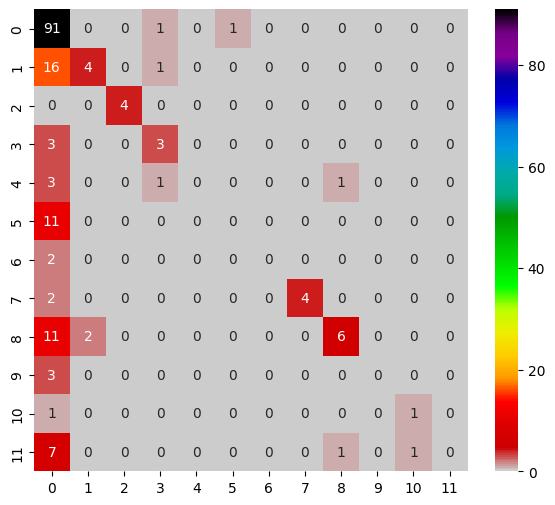

In [32]:
figure = plt.figure(figsize=(7, 6))
axes = sns.heatmap(confusion_df, annot=True,
                   cmap=plt.cm.nipy_spectral_r)

In [33]:
confusion_pca = confusion_matrix(y_true=expected, y_pred=predicted_pca)

In [34]:
confusion_df = pd.DataFrame(confusion_pca, index=range(12), columns=range(12))

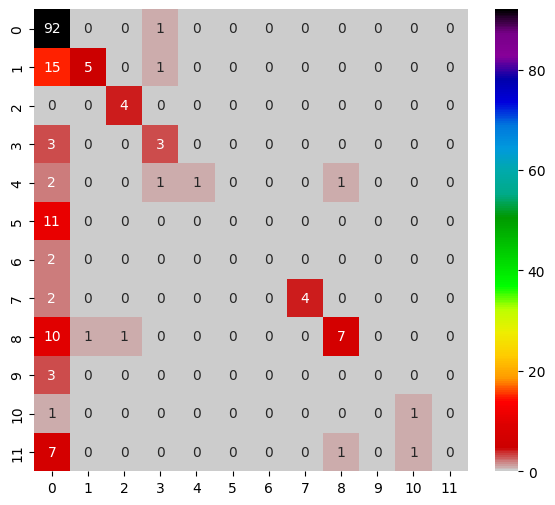

In [35]:
figure = plt.figure(figsize=(7, 6))
axes = sns.heatmap(confusion_df, annot=True,
                   cmap=plt.cm.nipy_spectral_r)